In [1]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Load data
dataset_path = '/content/drive/MyDrive/Colab Notebooks/IOT/smart_planting_dataset.csv'
df = pd.read_csv(dataset_path)


In [4]:
df.head(20)

,position,temperature,humidity,moisture,time,createdAt,updatedAt,__v
0,Malabe,30.8,81,2640,2025-04-07 10:09:21.334,2025-04-07 10:09:21.337,2025-04-07 10:09:21.337,0
1,Malabe,30.8,81,2661,2025-04-07 10:11:02.043,2025-04-07 10:11:02.044,2025-04-07 10:11:02.044,0
2,Malabe,30.8,83,2587,2025-04-07 10:13:24.384,2025-04-07 10:13:24.384,2025-04-07 10:13:24.384,0
3,Malabe,30.8,83,2624,2025-04-07 10:18:28.153,2025-04-07 10:18:28.154,2025-04-07 10:18:28.154,0
4,Malabe,28.9,88,1385,2025-04-08 04:21:32.895,2025-04-08 04:21:32.899,2025-04-08 04:21:32.899,0
5,Malabe,29.3,86,1393,2025-04-08 04:24:18.441,2025-04-08 04:24:18.442,2025-04-08 04:24:18.442,0
6,Malabe,29.3,85,1317,2025-04-08 04:26:37.764,2025-04-08 04:26:37.764,2025-04-08 04:26:37.764,0
7,Malabe,29.3,86,1287,2025-04-08 04:31:41.287,2025-04-08 04:31:41.320,2025-04-08 04:31:41.320,0
8,Malabe,31.3,75,1303,2025-04-08 04:36:44.686,2025-04-08 04:36:44.686,2025-04-08 04:36:44.686,0
9,Malabe,31.8,72,1355,2025-04-08 04:41:48.388,2025-04-08 04:41:48.388,2025-04-08 04:41:48.388,0


In [5]:
df.shape

(3486, 8)

In [6]:
# Assuming your column is called 'time'
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

print(df['time'].head())

0   2025-04-07 10:09:21.334
1   2025-04-07 10:11:02.043
2   2025-04-07 10:13:24.384
3   2025-04-07 10:18:28.153
4   2025-04-08 04:21:32.895
Name: time, dtype: datetime64[ns]


In [7]:
df.head(20)

,position,temperature,humidity,moisture,time,createdAt,updatedAt,__v
0,Malabe,30.8,81,2640,2025-04-07 10:09:21.334,2025-04-07 10:09:21.337,2025-04-07 10:09:21.337,0
1,Malabe,30.8,81,2661,2025-04-07 10:11:02.043,2025-04-07 10:11:02.044,2025-04-07 10:11:02.044,0
2,Malabe,30.8,83,2587,2025-04-07 10:13:24.384,2025-04-07 10:13:24.384,2025-04-07 10:13:24.384,0
3,Malabe,30.8,83,2624,2025-04-07 10:18:28.153,2025-04-07 10:18:28.154,2025-04-07 10:18:28.154,0
4,Malabe,28.9,88,1385,2025-04-08 04:21:32.895,2025-04-08 04:21:32.899,2025-04-08 04:21:32.899,0
5,Malabe,29.3,86,1393,2025-04-08 04:24:18.441,2025-04-08 04:24:18.442,2025-04-08 04:24:18.442,0
6,Malabe,29.3,85,1317,2025-04-08 04:26:37.764,2025-04-08 04:26:37.764,2025-04-08 04:26:37.764,0
7,Malabe,29.3,86,1287,2025-04-08 04:31:41.287,2025-04-08 04:31:41.320,2025-04-08 04:31:41.320,0
8,Malabe,31.3,75,1303,2025-04-08 04:36:44.686,2025-04-08 04:36:44.686,2025-04-08 04:36:44.686,0
9,Malabe,31.8,72,1355,2025-04-08 04:41:48.388,2025-04-08 04:41:48.388,2025-04-08 04:41:48.388,0


In [8]:
# Set 'time' as the index
df.set_index('time', inplace=True)

In [9]:
df.head(5)

,position,temperature,humidity,moisture,createdAt,updatedAt,__v
time,,,,,,,
2025-04-07 10:09:21.334,Malabe,30.8,81,2640,2025-04-07 10:09:21.337,2025-04-07 10:09:21.337,0
2025-04-07 10:11:02.043,Malabe,30.8,81,2661,2025-04-07 10:11:02.044,2025-04-07 10:11:02.044,0
2025-04-07 10:13:24.384,Malabe,30.8,83,2587,2025-04-07 10:13:24.384,2025-04-07 10:13:24.384,0
2025-04-07 10:18:28.153,Malabe,30.8,83,2624,2025-04-07 10:18:28.154,2025-04-07 10:18:28.154,0
2025-04-08 04:21:32.895,Malabe,28.9,88,1385,2025-04-08 04:21:32.899,2025-04-08 04:21:32.899,0


In [10]:
#Drop unnecessary columns
df.drop(columns=['createdAt', 'updatedAt', '__v'], inplace=True)

In [11]:
print(df.head(100))

                        position  temperature  humidity  moisture
time                                                             
2025-04-07 10:09:21.334   Malabe         30.8        81      2640
2025-04-07 10:11:02.043   Malabe         30.8        81      2661
2025-04-07 10:13:24.384   Malabe         30.8        83      2587
2025-04-07 10:18:28.153   Malabe         30.8        83      2624
2025-04-08 04:21:32.895   Malabe         28.9        88      1385
...                          ...          ...       ...       ...
2025-04-08 11:57:46.533   Malabe         31.3        74      1470
2025-04-08 12:02:50.147   Malabe         31.3        72      1477
2025-04-08 12:07:53.747   Malabe         31.3        75      1475
2025-04-08 12:12:57.265   Malabe         31.3        75      1474
2025-04-08 12:18:00.908   Malabe         30.8        75      1501

[100 rows x 4 columns]


In [12]:
# Resample data hourly and calculate mean
df_hourly = df.resample('H').mean(numeric_only=True)

# Resample daily
df_daily = df.resample('D').mean(numeric_only=True)

<ipython-input-12-630fc560e903>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean(numeric_only=True)


In [13]:
print(df_hourly.head())


                     temperature  humidity  moisture
time                                                
2025-04-07 10:00:00         30.8      82.0    2628.0
2025-04-07 11:00:00          NaN       NaN       NaN
2025-04-07 12:00:00          NaN       NaN       NaN
2025-04-07 13:00:00          NaN       NaN       NaN
2025-04-07 14:00:00          NaN       NaN       NaN


In [14]:
df_daily

,temperature,humidity,moisture
time,,,
2025-04-07,30.800000,82.000000,2628.000000
2025-04-08,30.387931,76.456897,1467.978448
2025-04-09,29.287273,87.563636,1511.900000
2025-04-10,28.482065,93.244565,1513.043478
2025-04-11,27.503922,93.985294,841.553922
2025-04-12,28.919718,83.683099,382.915493
2025-04-13,28.863889,90.583333,383.716667
2025-04-14,28.178788,95.824242,381.806061
2025-04-15,28.921941,88.021097,380.253165


In [15]:
df.shape

(3486, 4)

In [16]:
df.isnull().sum()

,0
position,0
temperature,0
humidity,0
moisture,0


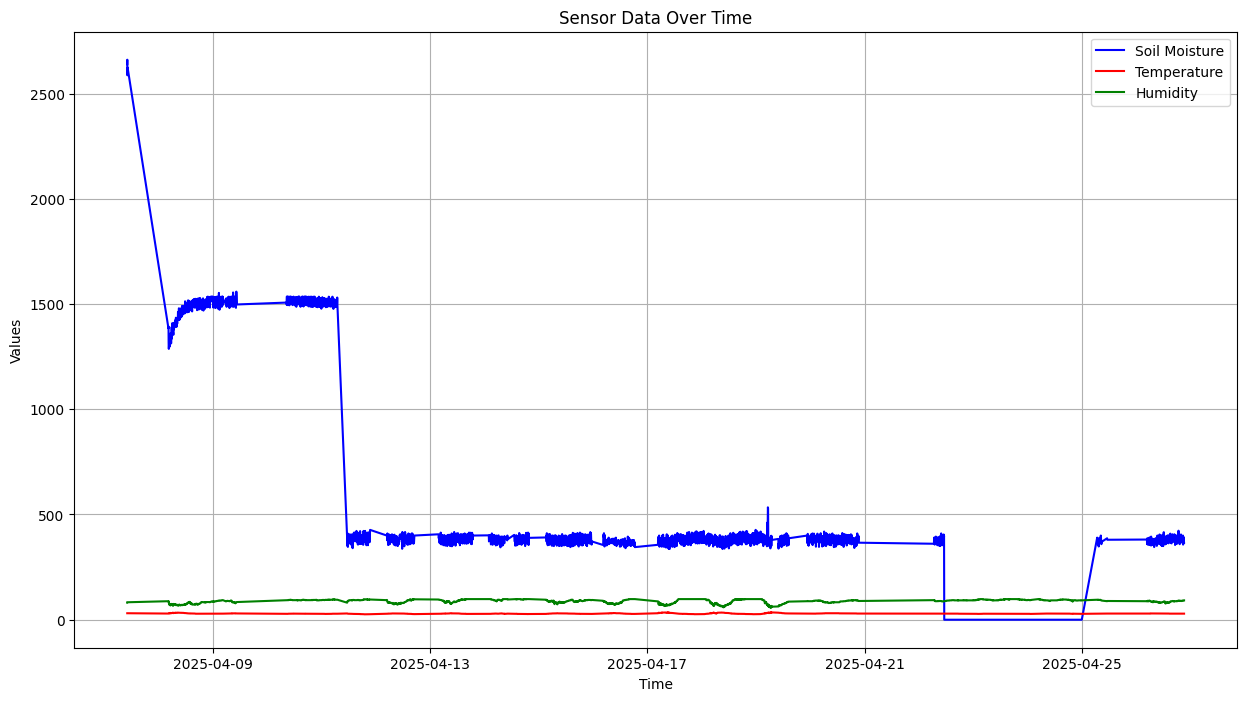

In [17]:
# 1. Plot all variables over time
plt.figure(figsize=(15,8))
plt.plot(df.index, df['moisture'], label='Soil Moisture', color='blue')
plt.plot(df.index, df['temperature'], label='Temperature', color='red')
plt.plot(df.index, df['humidity'], label='Humidity', color='green')
plt.title('Sensor Data Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

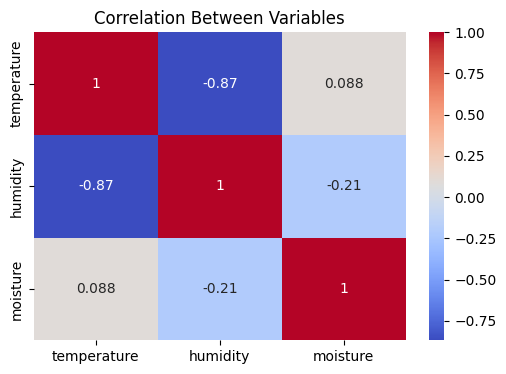

In [18]:
# 2. Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['temperature', 'humidity', 'moisture']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

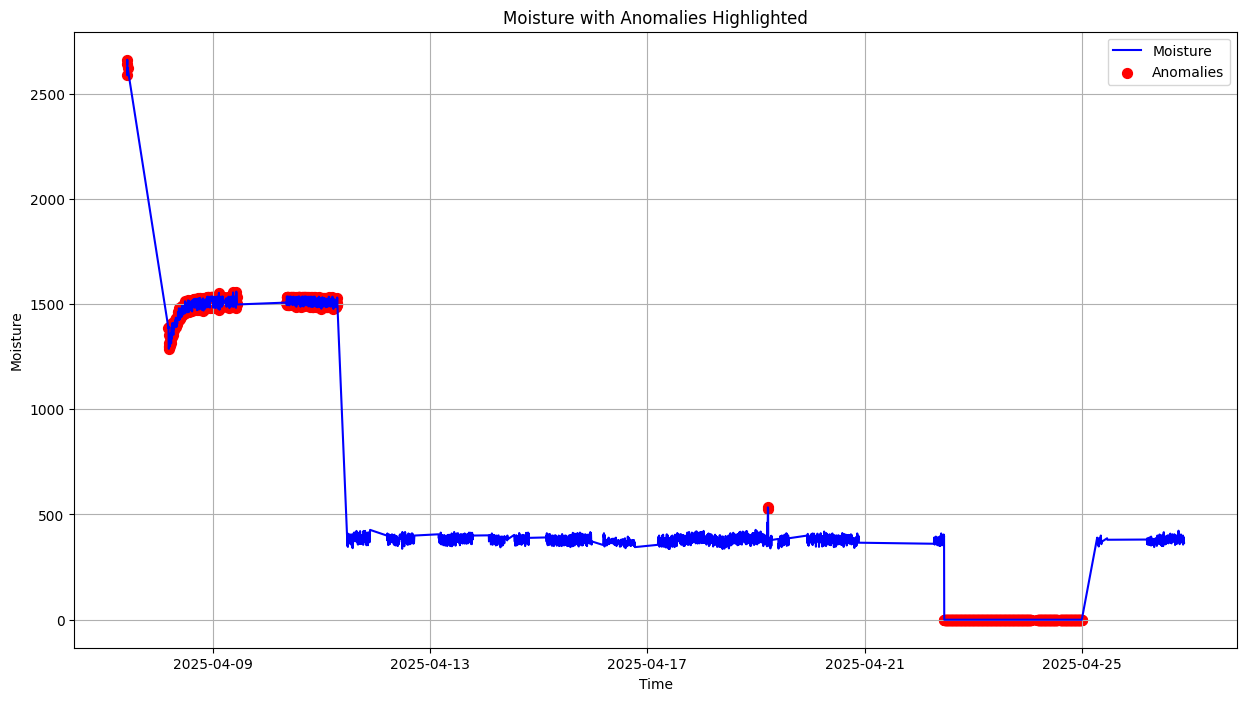

Number of moisture anomalies detected: 1291


In [19]:
# 3. Anomaly Detection (Simple: Moisture values outside 1.5 IQR)
Q1 = df['moisture'].quantile(0.25)
Q3 = df['moisture'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find anomalies
anomalies = df[(df['moisture'] < lower_bound) | (df['moisture'] > upper_bound)]


# Plot anomalies
plt.figure(figsize=(15,8))
plt.plot(df.index, df['moisture'], label='Moisture', color='blue')
plt.scatter(anomalies.index, anomalies['moisture'], color='red', label='Anomalies', s=50)
plt.title('Moisture with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Moisture')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of moisture anomalies detected: {len(anomalies)}")

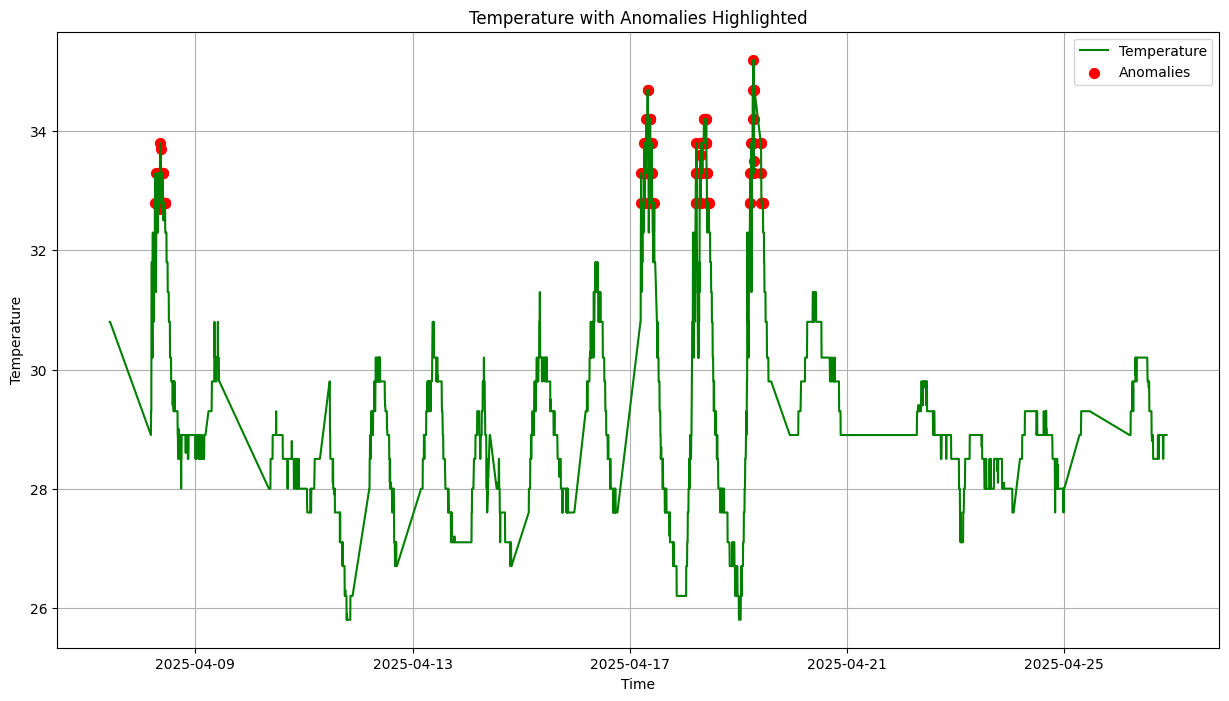

Number of temperature anomalies detected: 173


In [20]:
# 3. Anomaly Detection (Simple: Temperature values outside 1.5 IQR)
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find anomalies
anomalies = df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)]


# Plot anomalies
plt.figure(figsize=(15,8))
plt.plot(df.index, df['temperature'], label='Temperature', color='green')
plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomalies', s=50)
plt.title('Temperature with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of temperature anomalies detected: {len(anomalies)}")

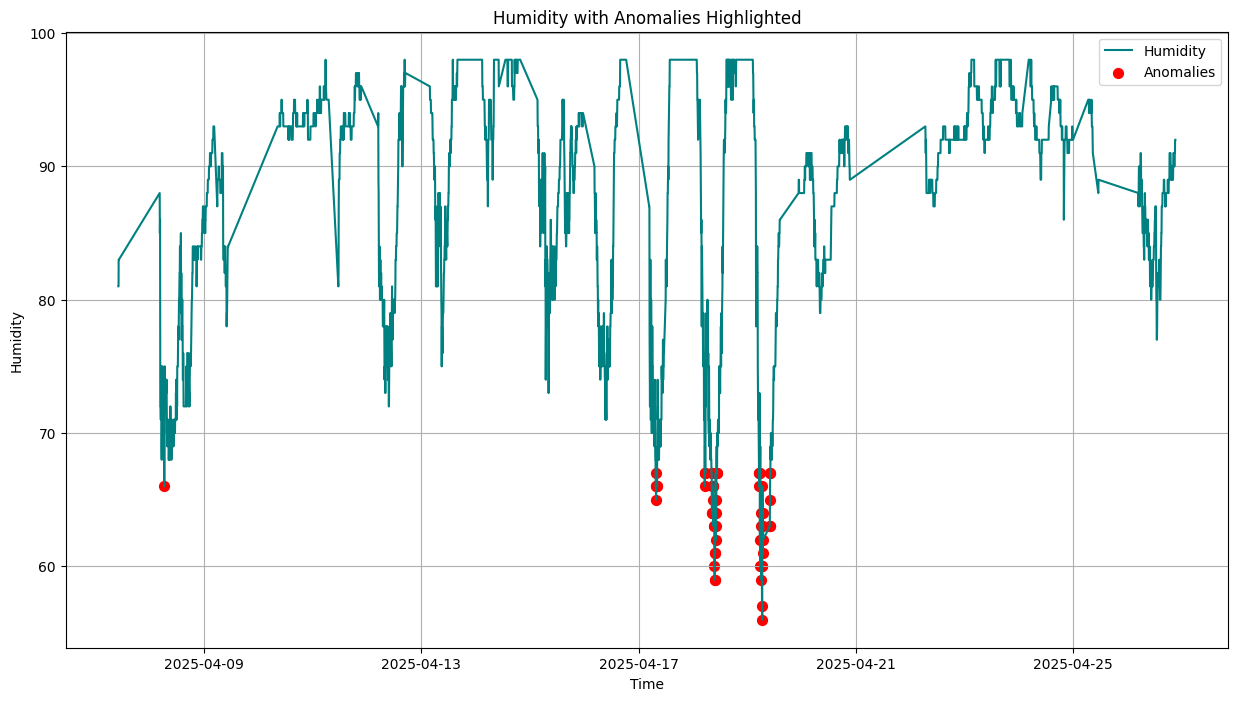

Number of humidity anomalies detected: 63


In [21]:
# 3. Anomaly Detection (Simple: Humidity values outside 1.5 IQR)
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find anomalies
anomalies = df[(df['humidity'] < lower_bound) | (df['humidity'] > upper_bound)]


# Plot anomalies
plt.figure(figsize=(15,8))
plt.plot(df.index, df['humidity'], label='Humidity', color='teal')
plt.scatter(anomalies.index, anomalies['humidity'], color='red', label='Anomalies', s=50)
plt.title('Humidity with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of humidity anomalies detected: {len(anomalies)}")

In [22]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity on moisture
result = adfuller(df['moisture'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value is > 0.05, the series is non-stationary, apply differencing
if result[1] > 0.05:
    df['moisture_diff'] = df['moisture'].diff().dropna()
    print("Differencing applied to moisture")


ADF Statistic: -4.434642880050052
p-value: 0.0002576187893864253


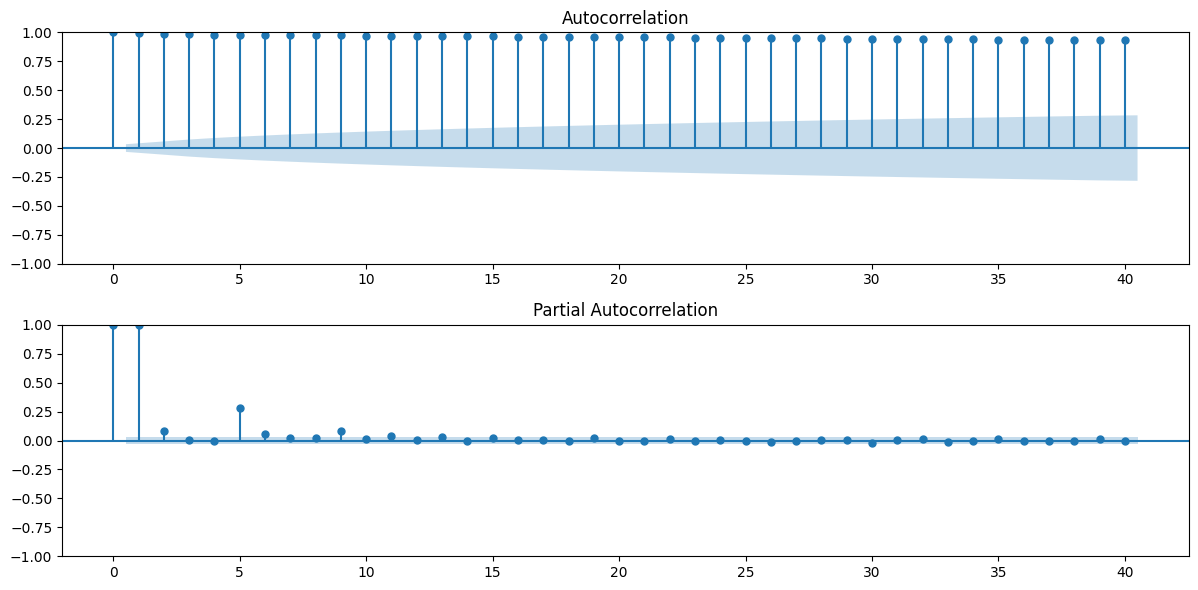

In [23]:
# Plot ACF and PACF for moisture data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(df['moisture'].dropna(), lags=40, ax=plt.gca())

plt.subplot(2, 1, 2)
plot_pacf(df['moisture'].dropna(), lags=40, ax=plt.gca())

plt.tight_layout()
plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [30]:
from statsmodels.tsa.arima.model import ARIMA
# Drop NaNs and reset index
moisture_data = df['moisture'].dropna()

# Split data: 80% train, 20% test
train_size = int(len(moisture_data) * 0.8)
train, test = moisture_data[:train_size], moisture_data[train_size:]

# Fit ARIMA on training data
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast for the length of the test set
arima_forecast = arima_fit.forecast(steps=len(test))

# Calculate MAE and RMSE for ARIMA
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))

print(f"\nARIMA MAE: {arima_mae:.2f}")
print(f"ARIMA RMSE: {arima_rmse:.2f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA MAE: 120.73
ARIMA RMSE: 213.76


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [32]:
# Fit SARIMA on training data
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_fit = sarima_model.fit()

# Forecast for the length of the test set
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Calculate MAE and RMSE for SARIMA
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))

print(f"\nSARIMA MAE: {sarima_mae:.2f}")
print(f"SARIMA RMSE: {sarima_rmse:.2f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



SARIMA MAE: 457.85
SARIMA RMSE: 575.54


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model = ARIMA(df['moisture'], order=(1, 1, 1))  # Adjust orders based on ACF/PACF plots
model_fit = model.fit()

# Forecast the next 10 time steps
forecast = model_fit.forecast(steps=10)
print("ARIMA Forecast: ", forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast:  3486    364.991285
3487    364.992774
3488    364.992519
3489    364.992563
3490    364.992555
3491    364.992557
3492    364.992556
3493    364.992556
3494    364.992556
3495    364.992556
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model = ARIMA(df['temperature'], order=(1, 1, 1))  # Adjust orders based on ACF/PACF plots
model_fit = model.fit()

# Forecast the next 10 time steps
forecast = model_fit.forecast(steps=10)
print("ARIMA Forecast: ", forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast:  3486    28.9
3487    28.9
3488    28.9
3489    28.9
3490    28.9
3491    28.9
3492    28.9
3493    28.9
3494    28.9
3495    28.9
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA model (seasonal_order=(p,d,q,s))
sarima_model = SARIMAX(df['moisture'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust based on seasonal pattern
sarima_fit = sarima_model.fit()

# Forecast the next 10 time steps
sarima_forecast = sarima_fit.forecast(steps=10)
print("SARIMA Forecast: ", sarima_forecast)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA Forecast:  3486    362.532653
3487    361.851632
3488    363.257991
3489    362.124167
3490    362.286214
3491    364.132878
3492    363.141814
3493    355.489605
3494    358.088750
3495    357.535100
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# ARIMAX Model using temperature and humidity as exogenous variables
exog_vars = df[['temperature', 'humidity']]

# ARIMAX
arimax_model = ARIMA(df['moisture'], order=(1, 1, 1), exog=exog_vars)
arimax_fit = arimax_model.fit()

# Forecast with exogenous variables
forecast_exog = arimax_fit.forecast(steps=10, exog=exog_vars[-10:])
print("ARIMAX Forecast: ", forecast_exog)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMAX Forecast:  3486    362.360145
3487    362.358162
3488    362.358503
3489    359.707053
3490    359.707063
3491    359.707061
3492    362.358453
3493    362.358453
3494    365.009845
3495    365.009845
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
threshold = 2000  # Example threshold for watering

# Check the forecasted moisture and give watering recommendation
for i, forecast_value in enumerate(forecast):
    if forecast_value < threshold:
        print(f"Day {i+1}: Soil moisture is forecasted to be {forecast_value}, trigger watering!")


Day 1: Soil moisture is forecasted to be 28.899999999999384, trigger watering!
Day 2: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 3: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 4: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 5: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 6: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 7: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 8: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 9: Soil moisture is forecasted to be 28.89999999999941, trigger watering!
Day 10: Soil moisture is forecasted to be 28.89999999999941, trigger watering!


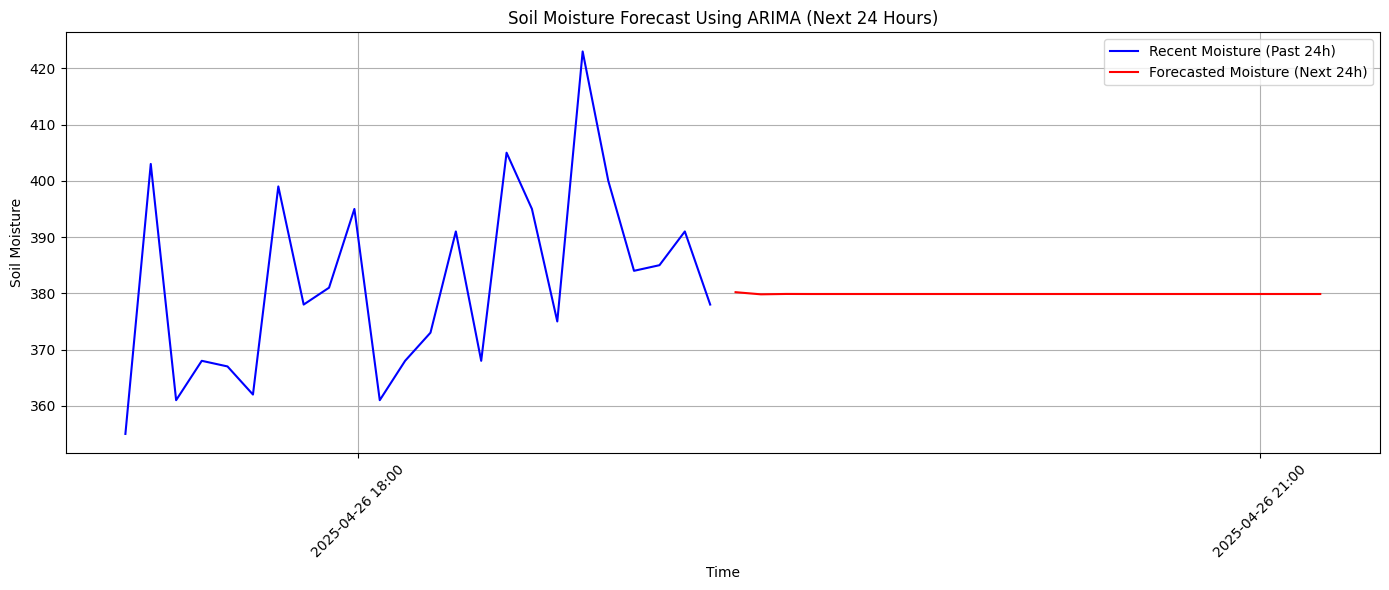

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the index is datetime
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# ====> Plot: Recent Actual + 24-Hour Forecast (Only)
plt.figure(figsize=(14, 6))

# Plot last 24 hours of training data
plt.plot(train.index[-24:], train[-24:], label='Recent Moisture (Past 24h)', color='blue')

# Plot ARIMA forecast (next 24h)
plt.plot(test.index, arima_forecast, label='Forecasted Moisture (Next 24h)', color='red')

# Format x-axis to show date and hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.xticks(rotation=45)

plt.title("Soil Moisture Forecast Using ARIMA (Next 24 Hours)")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

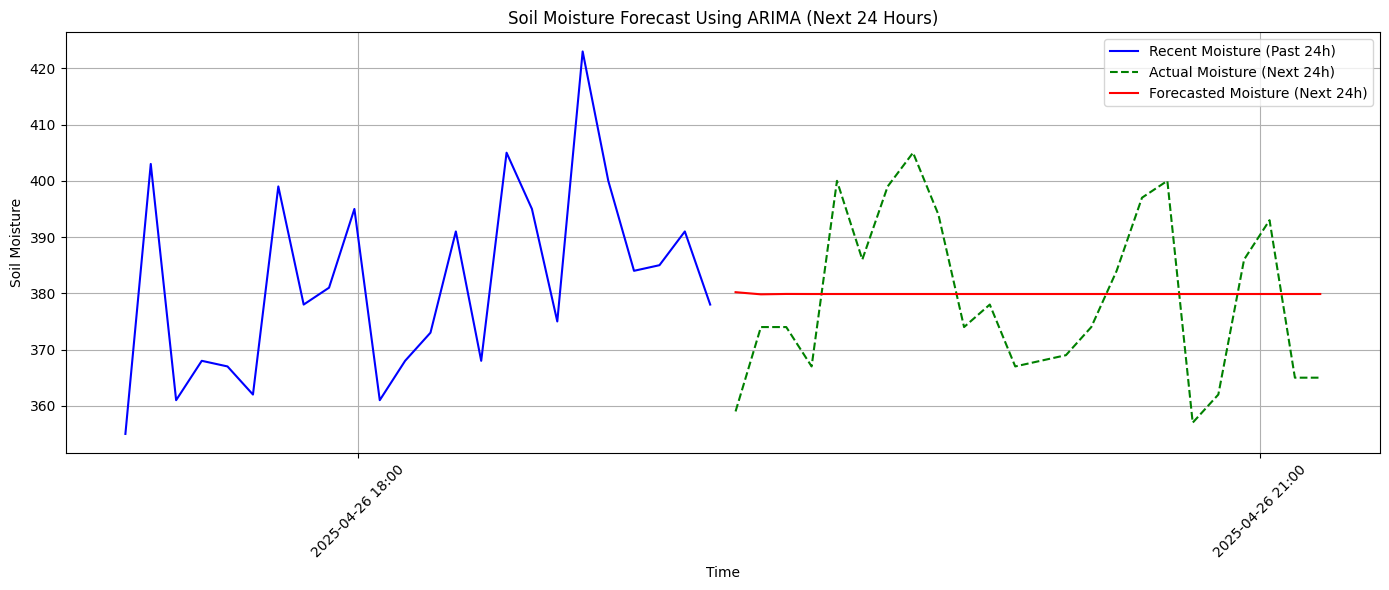

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the index is datetime (in case it's not)
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# ====> Plot: Recent Actual + 24-Hour Forecast
plt.figure(figsize=(14, 6))

# Plot last 24 hours of training data
plt.plot(train.index[-24:], train[-24:], label='Recent Moisture (Past 24h)', color='blue')

# Plot actual test values (next 24h)
plt.plot(test.index, test, label='Actual Moisture (Next 24h)', color='green', linestyle='--')

# Plot ARIMA forecast (next 24h)
plt.plot(test.index, arima_forecast, label='Forecasted Moisture (Next 24h)', color='red')

# Format x-axis to show date and hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # label every 3 hours
plt.xticks(rotation=45)

plt.title("Soil Moisture Forecast Using ARIMA (Next 24 Hours)")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
